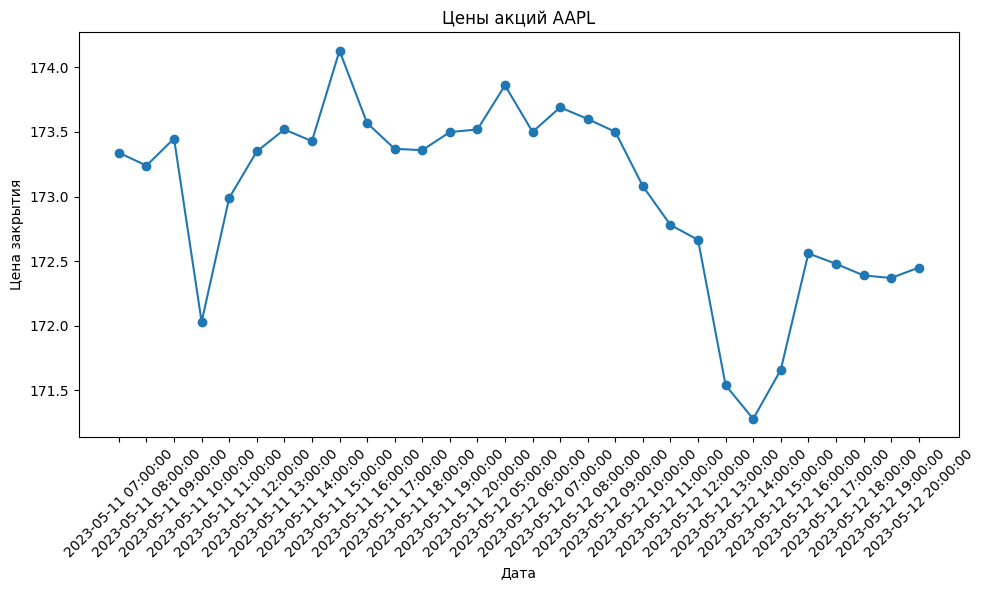

In [2]:
import requests
import matplotlib.pyplot as plt

# Замените `YOUR_API_KEY` на ваш ключ API Alpha Vantage
API_KEY = '5U6Z9XX4HCNUJRHQ'

def get_stock_data(symbol):
    # Запросить данные о ценах акций с помощью API Alpha Vantage
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=60min&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()

    # Извлечь только ценовые данные за последние 30 дней
    time_series = data['Time Series (60min)']
    dates = list(time_series.keys())[:30][::-1]
    closing_prices = [float(time_series[date]['4. close']) for date in dates]

    return dates, closing_prices

def plot_stock_data(symbol, dates, closing_prices):
    # Создать график цен акций
    plt.figure(figsize=(10, 6))
    plt.plot(dates, closing_prices, marker='o')
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.title(f'Цены акций {symbol}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Символ акции, данные которой хотите визуализировать
stock_symbol = 'AAPL'

# Получить данные о ценах акций
dates, closing_prices = get_stock_data(stock_symbol)

# Визуализировать данные
plot_stock_data(stock_symbol, dates, closing_prices)
